
## Source: John Mueller, *[Redeeming Economics](https://www.amazon.com/Redeeming-Economics-Rediscovering-Missing-Enterprise/dp/1932236953)* (2014): 239

<img src="../saves/png/weekly_worship_vs._Fertility.png" />

In [79]:

%pprint
%run ../load_magic/soup.py
%run ../load_magic/lists.py
%run ../load_magic/charts.py

url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate'
table_dfs_list = get_page_tables(url)

Pretty printing has been turned OFF
[(12, (534, 3)), (18, (526, 3)), (3, (519, 3)), (0, (512, 3)), (6, (502, 3)), (9, (464, 3)), (15, (444, 3)), (20, (287, 3)), (7, (271, 3)), (13, (266, 3)), (2, (265, 3)), (14, (264, 3)), (4, (258, 3)), (5, (257, 3)), (1, (243, 3)), (19, (235, 3)), (10, (233, 3)), (8, (227, 3)), (11, (227, 3)), (16, (221, 3)), (17, (219, 3)), (24, (9, 3)), (21, (12, 2)), (26, (4, 2)), (29, (4, 2)), (23, (3, 2)), (25, (3, 2)), (30, (3, 2)), (27, (2, 2)), (28, (2, 2)), (22, (1, 2))]


In [80]:

fertility_df = table_dfs_list[0].copy().replace('-', np.nan).dropna().iloc[1:193]
fertility_df.columns = ['Rank', 'Country', 'Fertility_Rate_2022']
fertility_df.Fertility_Rate_2022 = fertility_df.Fertility_Rate_2022.map(lambda x: float(str(x).split(' ')[0]))
fertility_df

,Rank,Country,Fertility_Rate_2022
3,1,Niger,6.6
4,2,Somalia,5.7
5,3,DR Congo,5.5
6,4,Mali,5.5
7,5,Chad,5.4
...,...,...,...
192,188,Moldova,1.3
193,189,Italy,1.3
194,190,Bosnia and Herzegovina,1.2
195,191,Singapore,1.2


In [83]:

# From https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf
file_path = '../data/html/religious_commitment_by_country.html'
commitment_df = pd.read_html(file_path)[0].copy()
commitment_df.columns = [str(cn).replace(' ', '_') for cn in commitment_df.iloc[0]]
commitment_df = commitment_df.iloc[1:]
for cn in ['Overall_Affiliate', 'Overall_Attend_weekly', 'Overall_Pray_daily', 'Overall_Very_important', 'Adults_<_40_Affiliate',
           'Adults_<_40_Attend_weekly', 'Adults_<_40_Pray_daily', 'Adults_<_40_Very_important', 'Adults_40+_Affiliate',
           'Adults_40+_Attend_weekly', 'Adults_40+_Pray_daily', 'Adults_40+_Very_important']:
    commitment_df[cn] = commitment_df[cn].map(lambda x: re.sub(r'\D+', '', str(x)))
    commitment_df[cn] = pd.to_numeric(commitment_df[cn], errors='coerce')
commitment_df

,Country,Overall_Affiliate,Overall_Attend_weekly,Overall_Pray_daily,Overall_Very_important,Adults_<_40_Affiliate,Adults_<_40_Attend_weekly,Adults_<_40_Pray_daily,Adults_<_40_Very_important,Adults_40+_Affiliate,Adults_40+_Attend_weekly,Adults_40+_Pray_daily,Adults_40+_Very_important
1,World,88,39,49,54,85,36,44.0,51.0,90.0,42.0,54.0,57.0
2,Asia-Pacific,85,34,50,53,82,31,46.0,51.0,86.0,37.0,55.0,55.0
3,Europe,81,14,22,23,75,10,16.0,19.0,85.0,16.0,26.0,26.0
4,Latin America-Caribbean,90,43,62,68,87,38,55.0,63.0,93.0,48.0,69.0,73.0
5,Middle East-North Africa,100,49,70,73,100,44,65.0,71.0,100.0,55.0,77.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uruguay,63,14,29,29,52,10,18.0,22.0,70.0,16.0,36.0,33.0
109,Uzbekistan,99,9,26,29,100,8,18.0,26.0,98.0,11.0,36.0,34.0
110,Venezuela,93,26,47,67,91,21,44.0,64.0,97.0,31.0,52.0,70.0
111,Vietnam,36,14,18,36,15,16,36.0,13.0,21.0,NaN,NaN,NaN


In [84]:

mask_series = (commitment_df.Country == 'Puerto Rico')
commitment_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'
mask_series = (commitment_df.Country == 'Dominican Rep.')
commitment_df.loc[mask_series, 'Country'] = 'Dominican Republic'
mask_series = (commitment_df.Country == 'Congo DR')
commitment_df.loc[mask_series, 'Country'] = 'DR Congo'
mask_series = (commitment_df.Country == 'Palestinian Terr.')
commitment_df.loc[mask_series, 'Country'] = 'Palestine'

In [85]:

left_list = list(set(fertility_df.Country) - set(commitment_df.Country))
df = check_for_typos(left_list, set(commitment_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
36,Iceland,Ireland,0.857143
32,Gambia,Zambia,0.833333
9,North Korea,South Korea,0.818182
60,Malawi,Mali,0.800000
65,Namibia,Zambia,0.769231
64,Congo,DR Congo,0.769231
53,Slovenia,Slovakia,0.750000
87,Aruba (Netherlands),Netherlands,0.733333
10,Guyana,Ghana,0.727273
31,Syria,Serbia,0.727273


In [86]:

mask_series = (commitment_df.Country == 'Bosnia-Herz.')
commitment_df.loc[mask_series, 'Country'] = 'Bosnia and Herzegovina'

In [87]:

left_list = list(set(commitment_df.Country) - set(fertility_df.Country))
df = check_for_typos(left_list, set(fertility_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
3,South Korea,North Korea,0.818182
6,Sub-Saharan Africa,South Africa,0.666667
0,Middle East-North Africa,South Africa,0.555556
2,World,Jordan,0.545455
1,Europe,Turkey,0.500000
7,Kosovo,Moldova,0.461538
5,Asia-Pacific,Jamaica,0.421053
4,Latin America-Caribbean,Liberia,0.400000


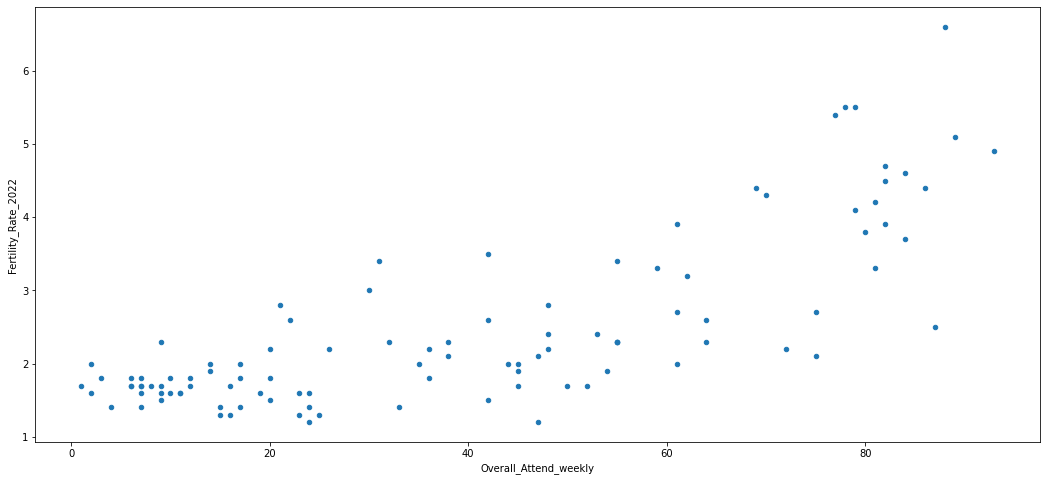

In [88]:

import matplotlib.pyplot as plt

countries_set = set(commitment_df.Country).intersection(set(fertility_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (commitment_df.Country == country_name)
    Overall_Attend_weekly = commitment_df[mask_series].Overall_Attend_weekly.squeeze()
    row_dict['Overall_Attend_weekly'] = Overall_Attend_weekly
    mask_series = (fertility_df.Country == country_name)
    Fertility_Rate_2022 = fertility_df[mask_series].Fertility_Rate_2022.squeeze()
    row_dict['Fertility_Rate_2022'] = Fertility_Rate_2022
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Overall_Attend_weekly')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = df.plot.scatter('Overall_Attend_weekly', 'Fertility_Rate_2022', ax=ax)

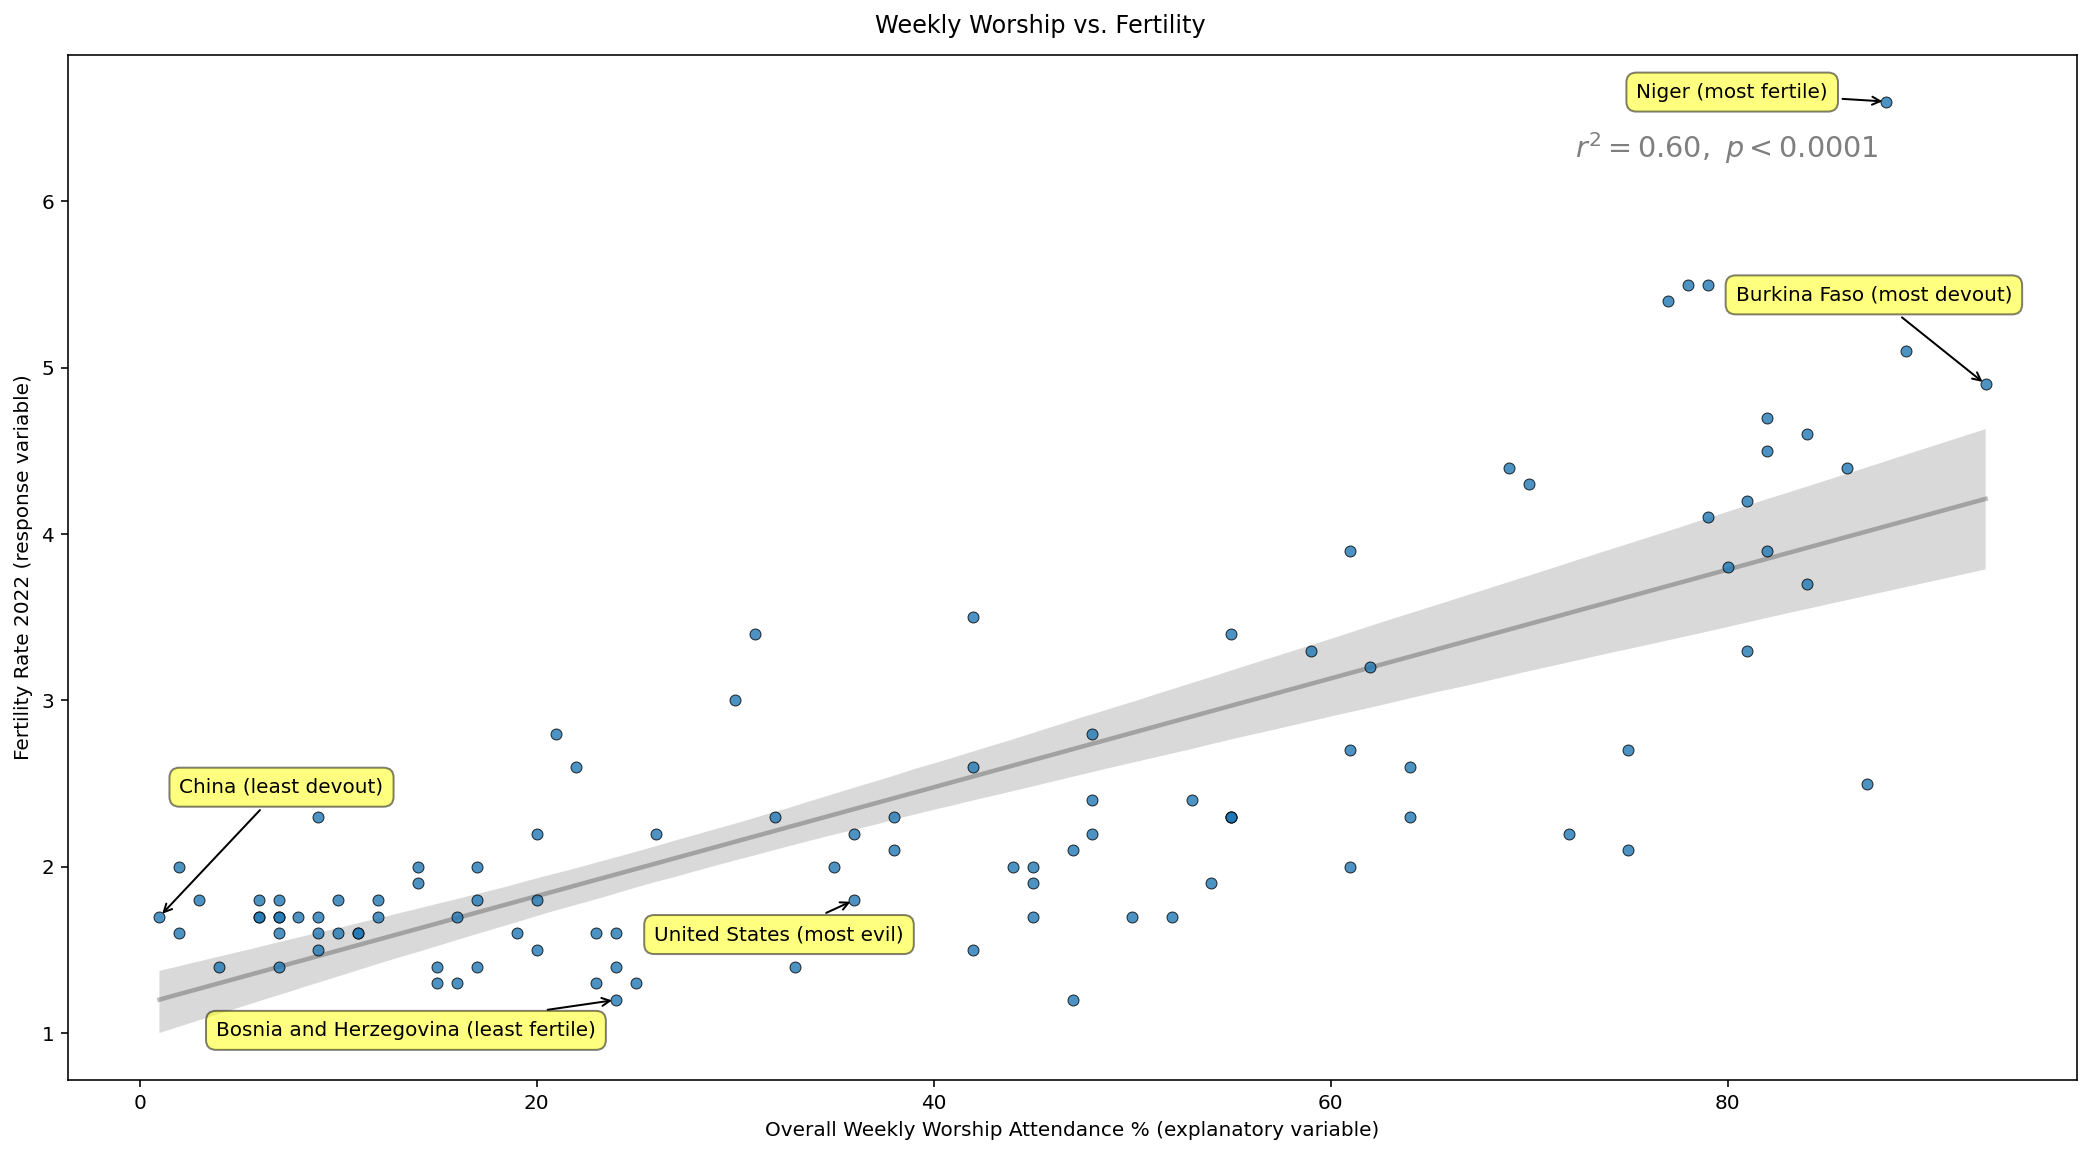

In [117]:

fig = first_order_linear_scatterplot(df.set_index('country_name'), 'Overall_Attend_weekly', 'Fertility_Rate_2022',
                                     xlabel_str='Overall Weekly Worship Attendance % (explanatory variable)',
                                     ylabel_str='Fertility Rate 2022 (response variable)',
                                     x_adj='devout', y_adj='fertile',
                                     title='Weekly Worship vs. Fertility',
                                     least_x_xytext=(10, 60), most_x_xytext=(-125, 40),
                                     least_y_xytext=(-200, -20), most_y_xytext=(-125, 0),
                                     reference_xytext=(-100, -22), color_list=None)

In [121]:

save_fig_as_various(fig, 'weekly_worship_vs_fertility', dir_names_list=['png'], verbose=True)

Saving plot to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\png\weekly_worship_vs_fertility.png
